In [1]:
from numpy import *
from scipy.stats import norm
import matplotlib.pyplot as plt

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier\ MC.pdf

In [2]:
def GRWPaths(initPrice, mu, sigma, T, numSteps, numPaths, barrier=False):
    """
    Computes numPaths random paths for a geometric random walk.
    
    Args:
        mu: is the annual drift, sigma the annual volatility;
        T: is the total length of time for the path (in years).
    Returns:
        random paths for a geometric random walk.
    """   
    paths = zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
    
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [initPrice] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * sqrt(dT) * random.normal(0,1))
    
    # Plot paths
    plt.figure(figsize=(8,6))
    [plt.plot(paths[:,i], linewidth=0.5) for i in range(numPaths)]
    plt.plot([0, numSteps], [K,K], color='r', linewidth=3, linestyle='-.',label='Strike price')
    if(barrier == True):
        plt.plot([0, numSteps], [Sb,Sb], color='y', linewidth=3, linestyle='-.',label='Barrier price')
    plt.title('Geometric Random Walk Paths',fontsize=16)
    plt.xlabel('Step #',fontsize=14)
    plt.ylabel('Stock Price',fontsize=14)
    plt.legend()
    plt.show()
    
    return paths

In [16]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):

    d1 = (log(S0/K)+(r+sigma**2/2)*(T))/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    
    c = S0 * norm.cdf(d1)-norm.cdf(d2)*K*exp(-r*(T))
    p = norm.cdf(-d2)*K*exp(-r*(T))-norm.cdf(-d1)*S0
    
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    
    S = GRWPaths(S0, mu, sigma, T, numSteps, numPaths)
    
    put = maximum(K - S[-1,:], 0)
    call = maximum(S[-1,:]- K, 0)
    
    p = mean(put)*exp(-r*T)
    c = mean(call)*exp(-r*T)
   
    return c, p

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    S = GRWPaths(S0, mu, sigma, T, numSteps, numPaths, barrier=True)
    
    put = zeros(numPaths)
    call = zeros(numPaths)
    
    for iPath in range(numPaths):
        if amax(S[:,iPath])>Sb:
            
            put[iPath] = maximum(K - S[-1,iPath], 0)
            call[iPath] = maximum(S[-1,iPath]- K, 0)
            
        else:
            put[iPath] = 0
            call[iPath] = 0
 
    p = mean(put)*exp(-r*T)
    c = mean(call)*exp(-r*T) 
    
    return c, p


In [4]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
BS_european_price (S0, K, T, r, sigma)
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price) + '\n')

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455



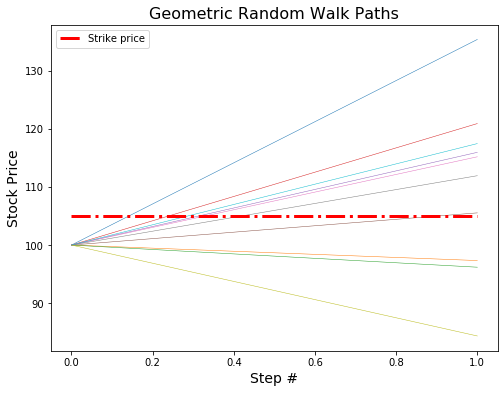

One-step MC price of an European call option is 8.308683547625838
One-step MC price of an European put option is 3.5312113478273375



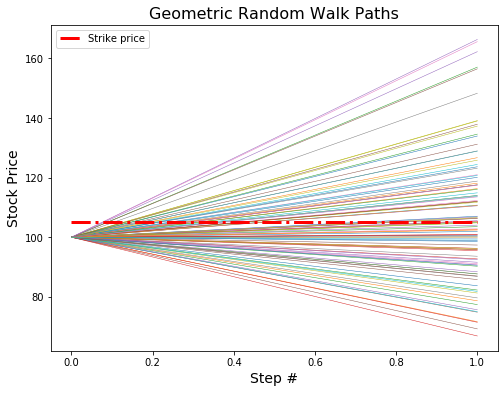

One-step MC price of an European call option is 8.787171810818332
One-step MC price of an European put option is 6.904861686541174



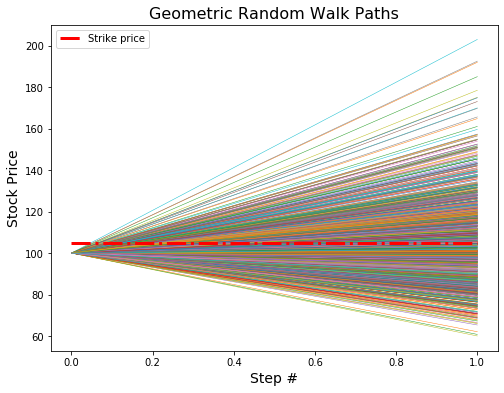

One-step MC price of an European call option is 8.305944937206458
One-step MC price of an European put option is 7.986124236255191



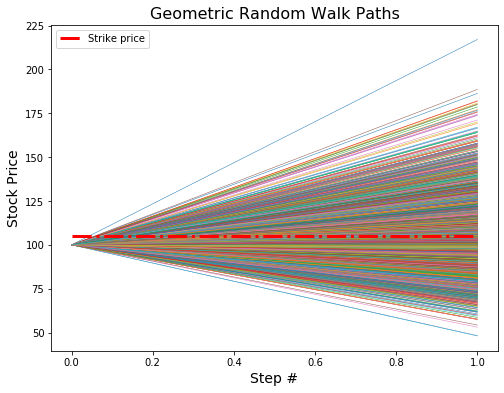

One-step MC price of an European call option is 8.362462676941453
One-step MC price of an European put option is 7.725215547844227



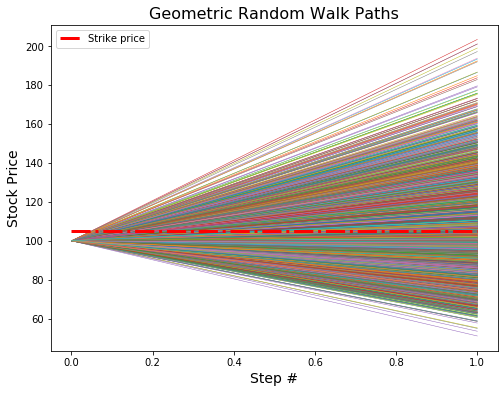

One-step MC price of an European call option is 7.921888344688633
One-step MC price of an European put option is 7.8230451590689905



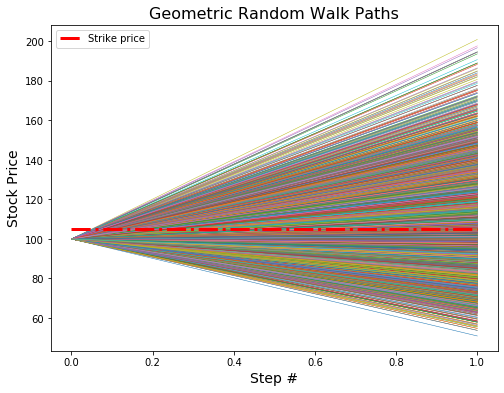

One-step MC price of an European call option is 8.0734902912011
One-step MC price of an European put option is 7.830954171104119



In [11]:
NPaths=[10,100,1000,2500,5000,7500]

for Paths in NPaths:
    callMC_European_Price_1_step, putMC_European_Price_1_step = \
    MC_european_price (S0, K, T, r, mu, sigma, 1 , Paths)
    print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
    print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step) + '\n')


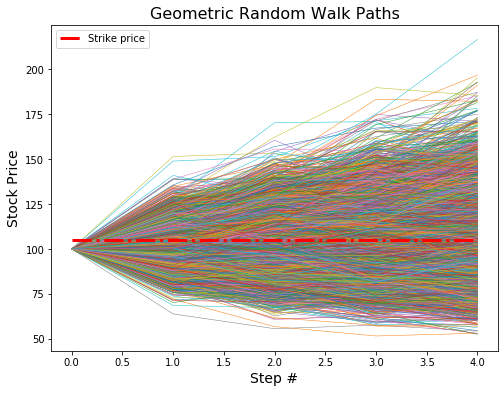

Multi-step MC price of an European call option is 7.800108913037911
Multi-step MC price of an European put option is 7.9973397646207385


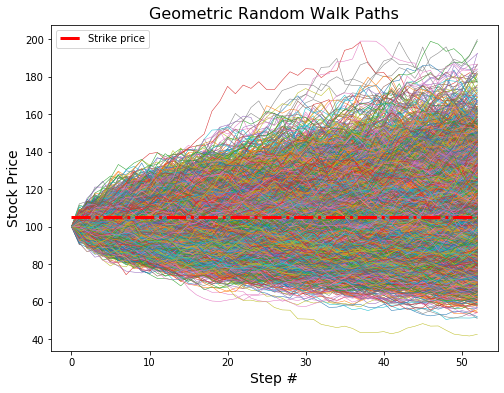

Multi-step MC price of an European call option is 7.86932983520201
Multi-step MC price of an European put option is 8.046341951579317


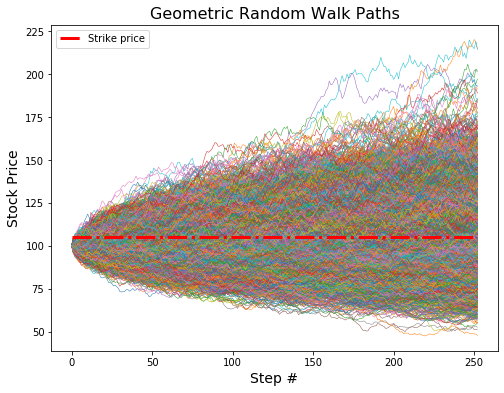

Multi-step MC price of an European call option is 7.81160989555981
Multi-step MC price of an European put option is 8.069014982949684


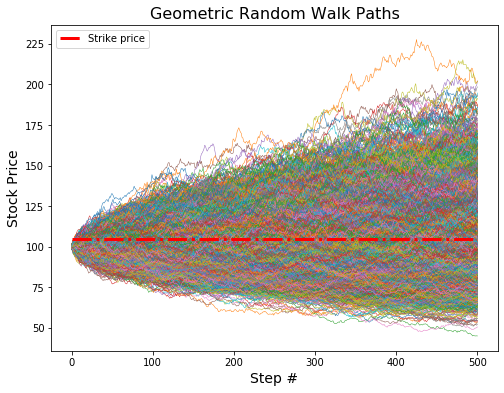

Multi-step MC price of an European call option is 7.990318729422521
Multi-step MC price of an European put option is 7.968823885391141


In [15]:
NSteps =[4, 52, 252, 500]
numPaths = 7500
for steps in NSteps:
    # Implement your multi-step Monte Carlo pricing procedure for European option
    callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
    MC_european_price (S0, K, T, r, mu, sigma, steps, numPaths)
    print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
    print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 

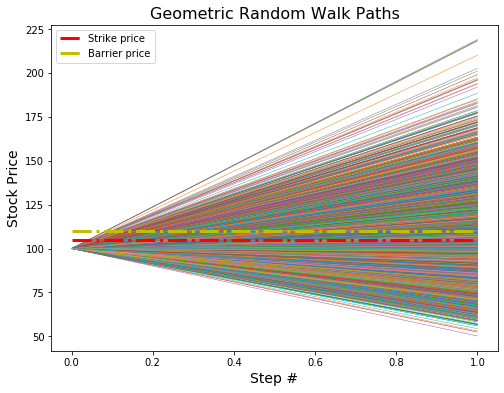

One-step MC price of an Barrier call option is 7.924497822118177
One-step MC price of an Barrier put option is 0.0


In [19]:
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, 1, 7500)
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 


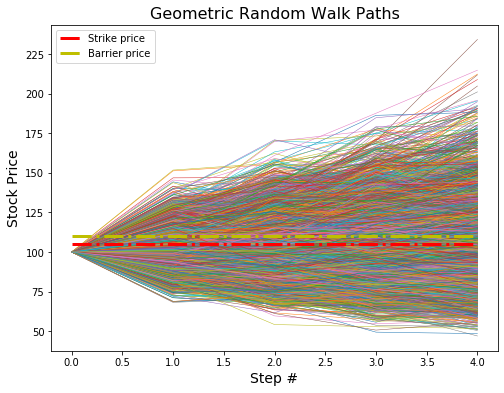

Multi-step MC price of an Barrier call option is 8.477490807905314
Multi-step MC price of an Barrier put option is 0.9190442645349673


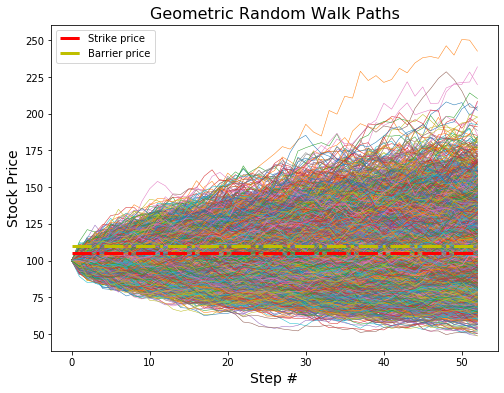

Multi-step MC price of an Barrier call option is 8.845600298871041
Multi-step MC price of an Barrier put option is 2.186622955432421


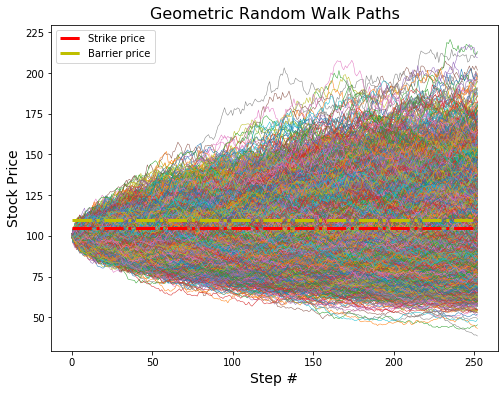

Multi-step MC price of an Barrier call option is 8.518342508412111
Multi-step MC price of an Barrier put option is 2.514908844272466


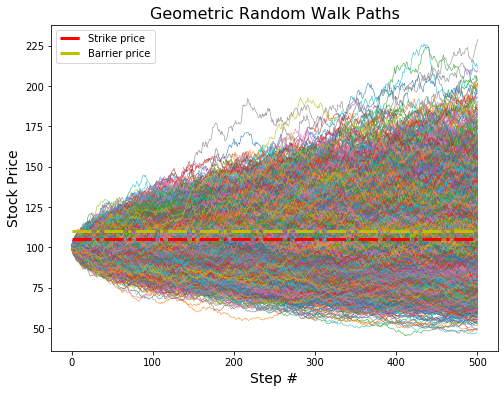

Multi-step MC price of an Barrier call option is 8.69756174989133
Multi-step MC price of an Barrier put option is 2.7186756070553053


In [23]:
NSteps =[4, 52, 252, 500]
numPaths = 7500
for steps in NSteps:
    # Implement your multi-step Monte Carlo pricing procedure for Barrier option
    callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
    MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, steps, 7500)
    print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
    print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

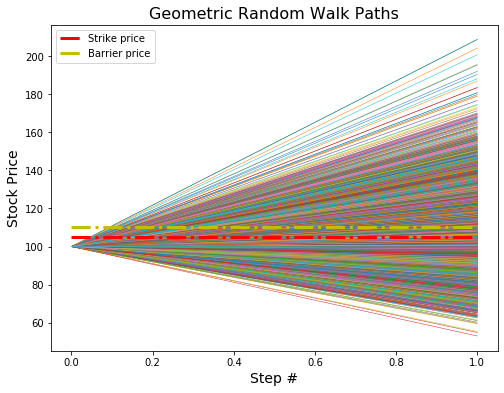

One-step MC price of an Barrier call option with volatility 0.18 is 7.248209484672903
One-step MC price of an Barrier put option with volatility 0.18 is 0.0


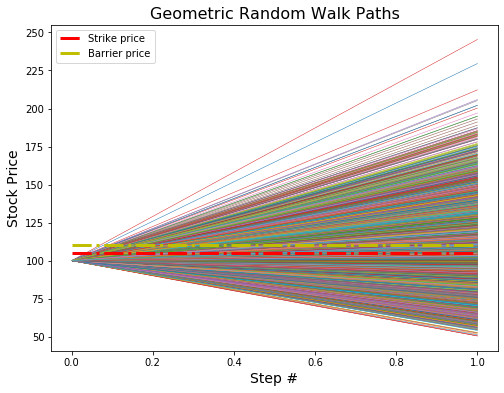

One-step MC price of an Barrier call option with volatility 0.22 is 8.772829963980618
One-step MC price of an Barrier put option with volatility 0.22 is 0.0


In [24]:
for sigma in [0.18, .22]:
    callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
    MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, 1, 7500)
    print('One-step MC price of an Barrier call option with volatility '+str(sigma)+' is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
    print('One-step MC price of an Barrier put option with volatility '+str(sigma)+' is ' + str(putMC_Barrier_Knockin_Price_1_step)) 


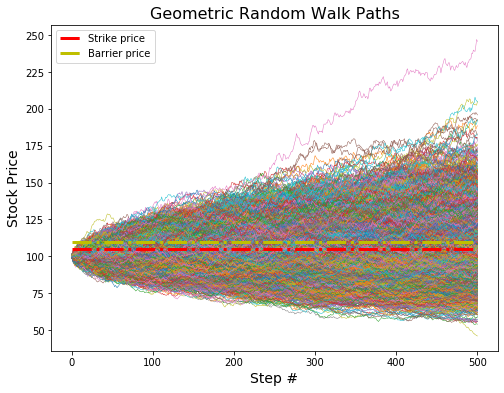

Multi-step MC price of an Barrier call option with volatility 0.18 is 7.074859917208853
Multi-step MC price of an Barrier put option with volatility 0.18 is 1.6569669139202368


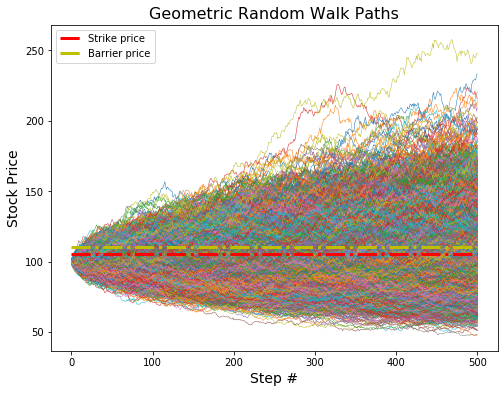

Multi-step MC price of an Barrier call option with volatility 0.22 is 8.870155058348553
Multi-step MC price of an Barrier put option with volatility 0.22 is 2.468851533868602


In [25]:
for sigma in [0.18, .22]:
    # Implement your multi-step Monte Carlo pricing procedure for Barrier option
    callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
    MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, 500, 7500)
    print('Multi-step MC price of an Barrier call option with volatility '+str(sigma)+' is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
    print('Multi-step MC price of an Barrier put option with volatility '+str(sigma)+' is ' + str(putMC_Barrier_Knockin_Price_multi_step))

In [26]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price) + '\n')

print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step) + '\n')

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455

One-step MC price of an European call option is 8.0734902912011
One-step MC price of an European put option is 7.830954171104119

One-step MC price of an Barrier call option is 8.772829963980618
One-step MC price of an Barrier put option is 0.0
